In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\vzhyvov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\vzhyvov\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Load and process the data

In [3]:
df = pd.read_csv('AirPassengers.csv')

In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
y = pd.Series(data=df['Passengers'].values, index=df['Month'])

In [8]:
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

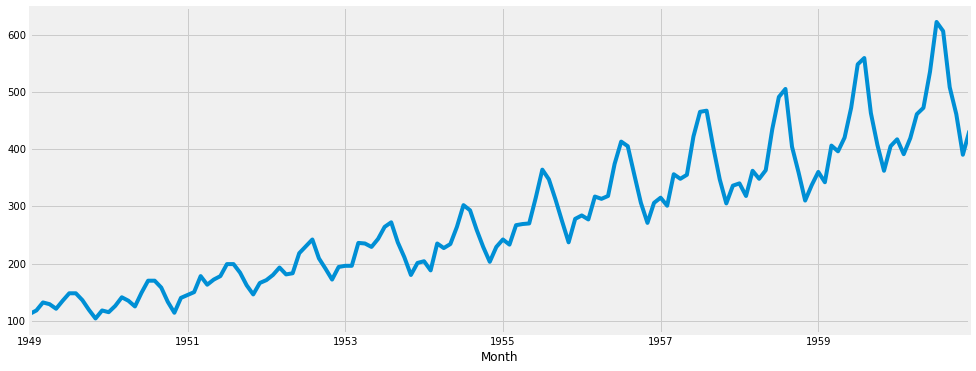

In [9]:
y.plot(figsize=(15, 6))
plt.show()

# Grid search the p, d, q parameters

In [10]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 2044.4329486427587
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1886.70324176889
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.2861804461697
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 1315.9211929474204
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.291490150855
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.1362797337536
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 1103.8641596218804
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.185608844917
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.3017303458581
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.2562043239484
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452265990209
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.2437994445113
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.6172166729348
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.4213211128161
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.2370895731701
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 83

ARIMA(0, 1, 2) x (1, 0, 2, 12) - AIC: 900.1407481793864
ARIMA(0, 1, 2) x (1, 1, 0, 12) - AIC: 936.782215035667
ARIMA(0, 1, 2) x (1, 1, 1, 12) - AIC: 915.1111429658607
ARIMA(0, 1, 2) x (1, 1, 2, 12) - AIC: 820.9921775778591
ARIMA(0, 1, 2) x (1, 2, 0, 12) - AIC: 871.3719829150822
ARIMA(0, 1, 2) x (1, 2, 1, 12) - AIC: 824.0789557985995
ARIMA(0, 1, 2) x (1, 2, 2, 12) - AIC: 728.3909654380925
ARIMA(0, 1, 2) x (2, 0, 0, 12) - AIC: 918.4251433142027
ARIMA(0, 1, 2) x (2, 0, 1, 12) - AIC: 920.0741266353699
ARIMA(0, 1, 2) x (2, 0, 2, 12) - AIC: 896.441196137497
ARIMA(0, 1, 2) x (2, 1, 0, 12) - AIC: 849.1077294091829
ARIMA(0, 1, 2) x (2, 1, 1, 12) - AIC: 850.8143234754482
ARIMA(0, 1, 2) x (2, 1, 2, 12) - AIC: 822.9785227748835
ARIMA(0, 1, 2) x (2, 2, 0, 12) - AIC: 770.1665719063974
ARIMA(0, 1, 2) x (2, 2, 1, 12) - AIC: 754.8857807881394
ARIMA(0, 1, 2) x (2, 2, 2, 12) - AIC: 729.0187073248388
ARIMA(0, 2, 0) x (0, 0, 0, 12) - AIC: 1441.350743331749
ARIMA(0, 2, 0) x (0, 0, 1, 12) - AIC: 1243.6526185

ARIMA(1, 0, 1) x (2, 1, 2, 12) - AIC: 839.2558089770229
ARIMA(1, 0, 1) x (2, 2, 0, 12) - AIC: 767.1156376894774
ARIMA(1, 0, 1) x (2, 2, 1, 12) - AIC: 752.2884897813548
ARIMA(1, 0, 1) x (2, 2, 2, 12) - AIC: 746.2099137660521
ARIMA(1, 0, 2) x (0, 0, 0, 12) - AIC: 1381.5217419605094
ARIMA(1, 0, 2) x (0, 0, 1, 12) - AIC: 1282.845253384231
ARIMA(1, 0, 2) x (0, 0, 2, 12) - AIC: 1036.5854046699535
ARIMA(1, 0, 2) x (0, 1, 0, 12) - AIC: 1009.2881584894942
ARIMA(1, 0, 2) x (0, 1, 1, 12) - AIC: 923.3041353897817
ARIMA(1, 0, 2) x (0, 1, 2, 12) - AIC: 836.4811525976393
ARIMA(1, 0, 2) x (0, 2, 0, 12) - AIC: 993.8462787294404
ARIMA(1, 0, 2) x (0, 2, 1, 12) - AIC: 832.6688985547908
ARIMA(1, 0, 2) x (0, 2, 2, 12) - AIC: 731.830527146414
ARIMA(1, 0, 2) x (1, 0, 0, 12) - AIC: 1010.7058013712008
ARIMA(1, 0, 2) x (1, 0, 1, 12) - AIC: 984.2779180924198
ARIMA(1, 0, 2) x (1, 0, 2, 12) - AIC: 903.6202659073766
ARIMA(1, 0, 2) x (1, 1, 0, 12) - AIC: 937.6961869297953
ARIMA(1, 0, 2) x (1, 1, 1, 12) - AIC: 929.569

ARIMA(1, 2, 1) x (0, 2, 2, 12) - AIC: 729.7922161264331
ARIMA(1, 2, 1) x (1, 0, 0, 12) - AIC: 1073.5503953779998
ARIMA(1, 2, 1) x (1, 0, 1, 12) - AIC: 989.1843745203458
ARIMA(1, 2, 1) x (1, 0, 2, 12) - AIC: 907.8028836622167
ARIMA(1, 2, 1) x (1, 1, 0, 12) - AIC: 926.4582272211354
ARIMA(1, 2, 1) x (1, 1, 1, 12) - AIC: 918.4549191268932
ARIMA(1, 2, 1) x (1, 1, 2, 12) - AIC: 831.7807386454347
ARIMA(1, 2, 1) x (1, 2, 0, 12) - AIC: 860.684093776536
ARIMA(1, 2, 1) x (1, 2, 1, 12) - AIC: 835.2565864866076
ARIMA(1, 2, 1) x (1, 2, 2, 12) - AIC: 731.7922177652011
ARIMA(1, 2, 1) x (2, 0, 0, 12) - AIC: 912.2132872813233
ARIMA(1, 2, 1) x (2, 0, 1, 12) - AIC: 914.207373817877
ARIMA(1, 2, 1) x (2, 0, 2, 12) - AIC: 905.7017500966634
ARIMA(1, 2, 1) x (2, 1, 0, 12) - AIC: 839.1221340836503
ARIMA(1, 2, 1) x (2, 1, 1, 12) - AIC: 839.2664443049067
ARIMA(1, 2, 1) x (2, 1, 2, 12) - AIC: 833.7807298936737
ARIMA(1, 2, 1) x (2, 2, 0, 12) - AIC: 759.6238190450426
ARIMA(1, 2, 1) x (2, 2, 1, 12) - AIC: 749.7300799

ARIMA(2, 1, 0) x (2, 0, 2, 12) - AIC: 904.6606815910078
ARIMA(2, 1, 0) x (2, 1, 0, 12) - AIC: 834.1388958372969
ARIMA(2, 1, 0) x (2, 1, 1, 12) - AIC: 836.126643235609
ARIMA(2, 1, 0) x (2, 1, 2, 12) - AIC: 830.1164599373577
ARIMA(2, 1, 0) x (2, 2, 0, 12) - AIC: 753.6967977948009
ARIMA(2, 1, 0) x (2, 2, 1, 12) - AIC: 739.2466160341511
ARIMA(2, 1, 0) x (2, 2, 2, 12) - AIC: 740.0381148222716
ARIMA(2, 1, 1) x (0, 0, 0, 12) - AIC: 1361.3857842642583
ARIMA(2, 1, 1) x (0, 0, 1, 12) - AIC: 1168.3690522219397
ARIMA(2, 1, 1) x (0, 0, 2, 12) - AIC: 1027.9355068034827
ARIMA(2, 1, 1) x (0, 1, 0, 12) - AIC: 1010.5527141848522
ARIMA(2, 1, 1) x (0, 1, 1, 12) - AIC: 933.35685065303
ARIMA(2, 1, 1) x (0, 1, 2, 12) - AIC: 841.4128390751241
ARIMA(2, 1, 1) x (0, 2, 0, 12) - AIC: 998.6256173630096
ARIMA(2, 1, 1) x (0, 2, 1, 12) - AIC: 836.2455768829641
ARIMA(2, 1, 1) x (0, 2, 2, 12) - AIC: 732.976798076526
ARIMA(2, 1, 1) x (1, 0, 0, 12) - AIC: 998.8582678492049
ARIMA(2, 1, 1) x (1, 0, 1, 12) - AIC: 988.252846

# Plot model diagnostics

In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.090      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.410      0.000      -0.629      -0.242
ma.L1          0.7786      0.204      3.810      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5151     28.036      4.227      0.000      63.565     173.466


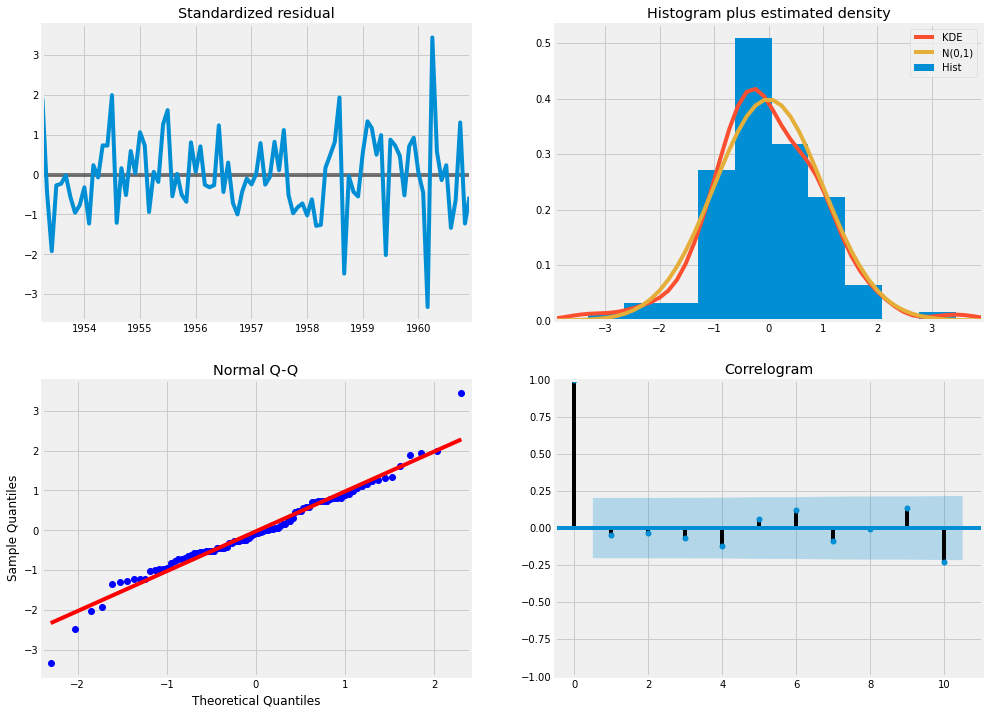

In [13]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

# Plot one-step ahead forecast

In [14]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

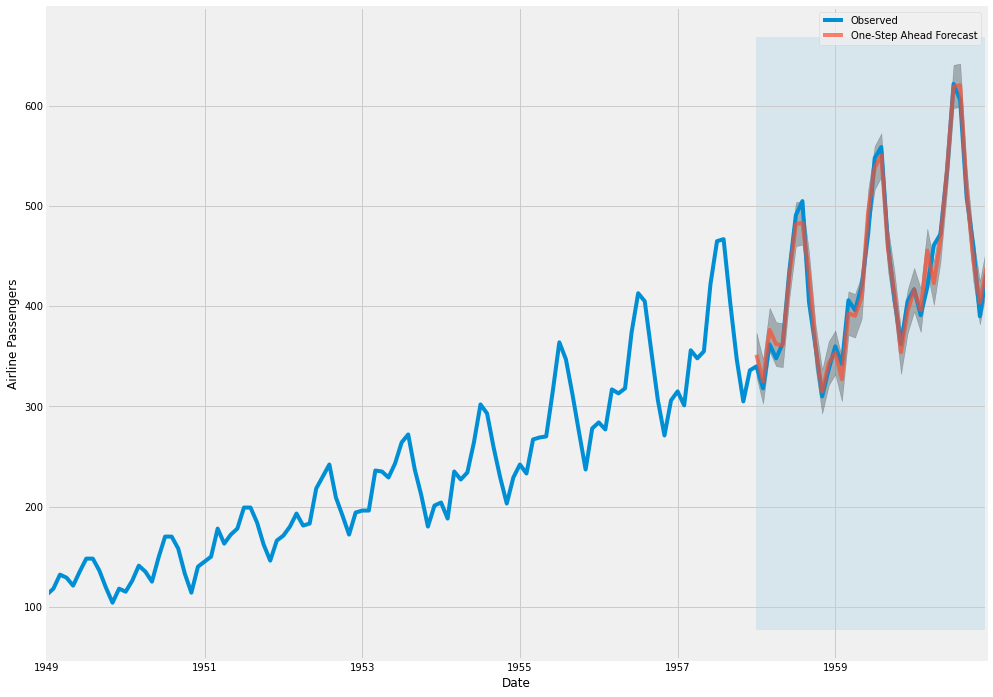

In [15]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [16]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


# Plot dynamic forecast

In [17]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

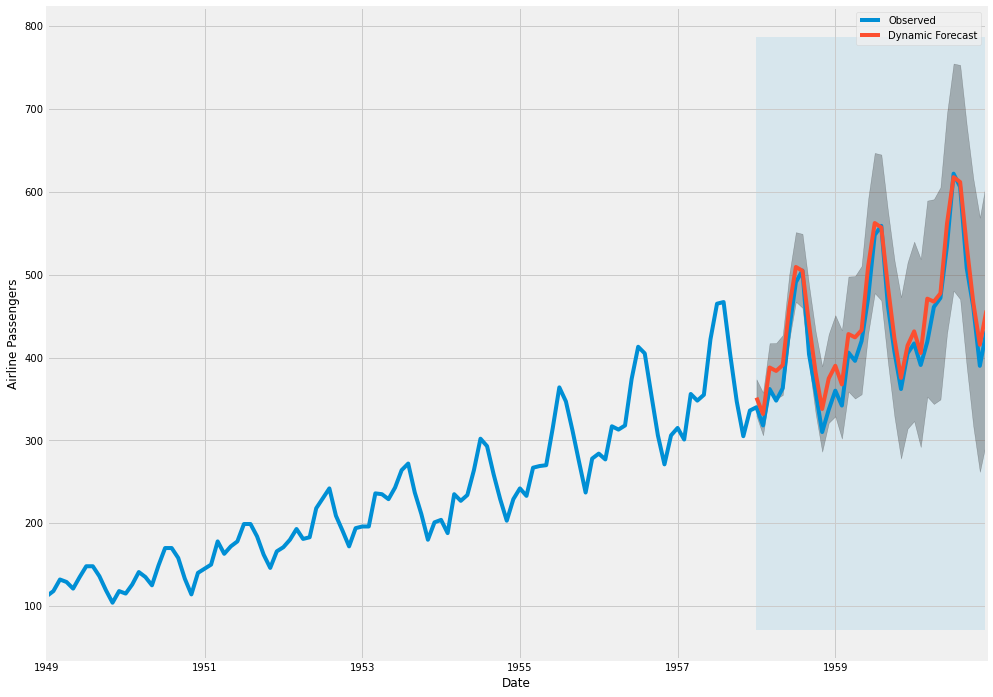

In [18]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [19]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.54


# Plot 2-year forecast

In [20]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

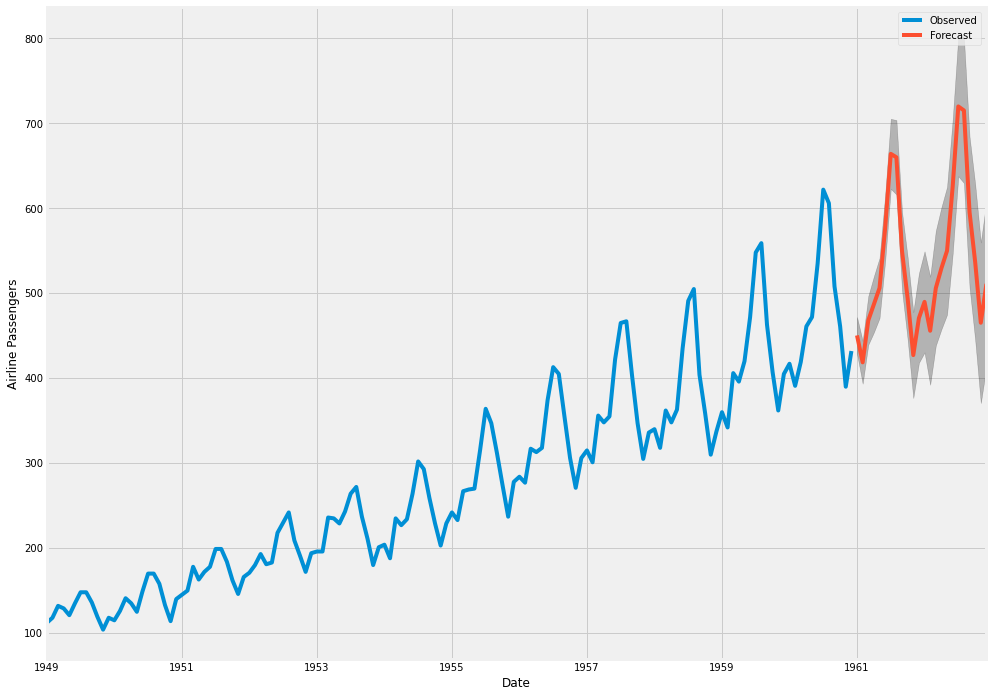

In [21]:
ax = y.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()